<a id="toc"></a>
# Overview

In this notebook, I am going to implement SVM (Support Vector Machine) model on 'Titanic - Machine Learning from disaster' using Scikit learn SVM llibrary (sklearn.svm).
The goal is to achieve as accurate as possible SVM model by hypertuning the parameters of different types of model within SVM library.

Table of contents:
1. What is SVM?2. [Scikit learn SVM library](#scikit)
3. [Load Data](#load)
4. [EDA](#eda)
5. [Train-Test Split](#train)
6. [Feature Engineering](#feature)
7. [Model Training](#model)
8. [Metrics](#metrics)
9. [Conclusion](#conclusion)
10. [Predictions test.csv for submitions](#predict)

<a id="svm"></a>
# What is SVM? [**↑**](#toc) 

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

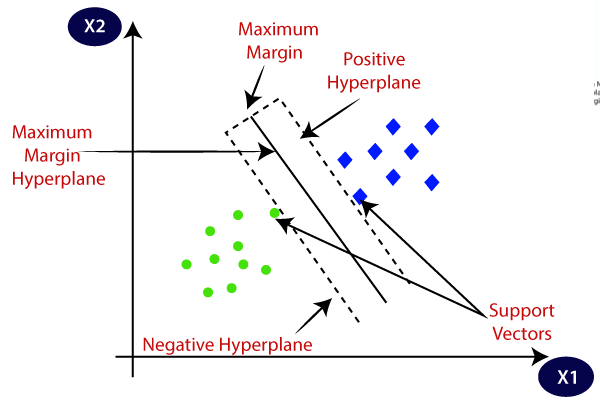

<a id='scikit'></a>
# Scikit learn SVM library [**↑**](#toc) 

The scikit learn SVM library contain 7 types of estimators used in Classification, Regression and unsupervised machine learning problems as required.

1. Classifiaciton estimators

    a. `svm.SVC` : C-Support Vector Classification
    
    b. `svm.NuSVC` : Nu-Support Vector Classifiction
    
    c. `svm.LinearSVC` : Linear Support Vector Classification
    
2. Regression estimators
    
    a. `svm.SVR` : C-Support Vector Regression
    
    b. `svm.NuSVR` : Nu-Support Vector Regression
    
    c. `svm.LinearSVR` : Linear Support Vector Regression
    
3. Unsupervised estimators

    a. `svm.OneClassSVM` : Unsupervised Outlier Detection
    
As the 'Titanic - Machine Learning from disaster' is a Classifiction problem so I am going to use Classification estimators for this problem.

A.`svm.SVC` : C-Support Vector Classification

**class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)**

The main parameter in this class are:

* C - Regularization parameter. 
* kernel - Specifies the kernel type to be used in the algorithm. Types: 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’.
* degree - Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
* gamma - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid'.

So, I will use these differnet types of kernel to find most accurate model by hypertuning (C, degree and gamma) parameters.

B. `svm.NuSVC` : Nu-Support Vector Classifiction

**class sklearn.svm.NuSVC(*, nu=0.5, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)**

Same as `svm.SVC`, only difference is 'nu' parameter is introduced in place of 'C' which controls the number of support vectors.

In this class, I will use these differnet types of kernel to find most accurate model by hypertuning (nu, degree and gamma) parameters.

C. `svm.LinearSVR` : Linear Support Vector Regression

**class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)**

This class is same as svm.SVC with 'linear' kernel but it gives more flexibility with other parameters like loss control.

The main parameter is this class is: 

* C

Here, I wiil use 'C' to find most accurate model for this class.
    

<a id="load"></a>
# Load Data [**↑**](#toc) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../input/titanic/train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="eda"></a>
# EDA [**↑**](#toc) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

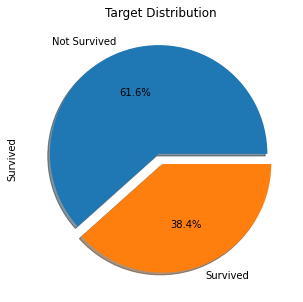

In [8]:
plt.figure(figsize=(5,5))
df["Survived"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', 
                                          labels=["Not Survived","Survived"],
                                          shadow=True).set_title("Target Distribution")

In [9]:
df.duplicated().sum()

0

<AxesSubplot:>

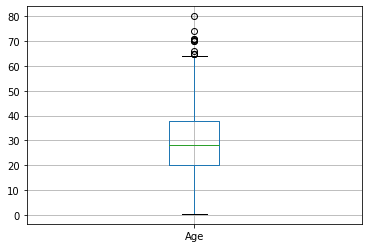

In [10]:
df[["Age"]].boxplot()

<AxesSubplot:>

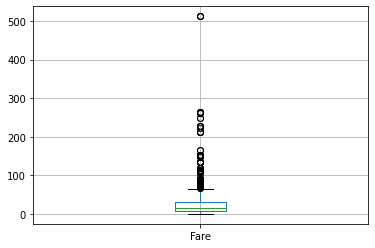

In [11]:
df[["Fare"]].boxplot()

<AxesSubplot:>

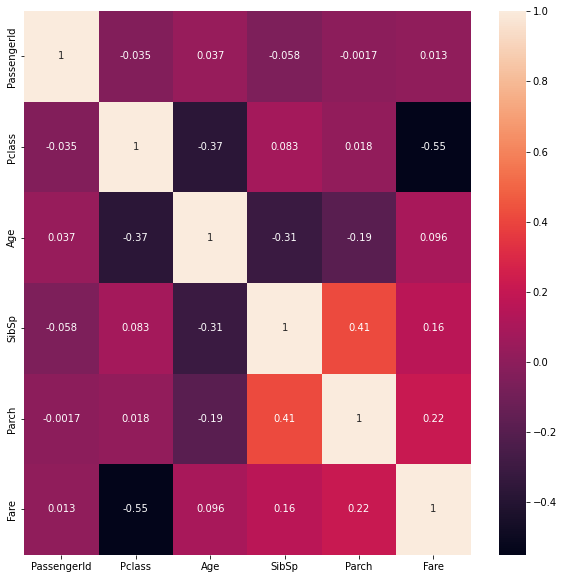

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) # to resize the heatmap
sns.heatmap(df.drop("Survived",axis=1).corr(), annot=True, ax=ax)

EDA observations:

1. Dataset contains variables like "Ticket" and "Names", these can be removed as they appear to be random unique identifies.
2. "PassengerId" is here used only for indexing, so it can be also removed.
2. Target class "Survived" has binary output with slighlt imbalance data.
3. "Age" and "Cabin" have missing values. The values in "Age" can be filled but in "Cabin" as most the values are missing, it will be removed.
4. With the help of boxplot, we can identify that variables "Age" and "Fare" contains outliers.
5. Lastly, no significant correlation is seen between independent variables.

<a id="train"></a>
# Train-Test Split [**↑**](#toc) 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived",axis=1), 
                                                   df["Survived"],
                                                   test_size=0.3,
                                                   random_state=100)

In [14]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,70,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
85,86,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
794,795,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
161,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
815,816,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
...,...,...,...,...,...,...,...,...,...,...,...
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S


<a id="feature"></a> 
# Feature Engineering [**↑**](#toc) 

1. [Removing variables](#removing)
2. [Dealing with missing values](#missing)
3. [One hot encoding variables](#onehot)
4. [Scaling variables](#scaling)

<a id="removing"></a>
## 1. Removing Variables

In [15]:
drop_list = ["PassengerId", "Name", "Cabin", "Ticket"]
X_train = X_train.drop(drop_list,axis=1)
X_test = X_test.drop(drop_list,axis=1)

<a id='missing'></a>
## 2. Dealing with missing values

In [16]:
X_train["Age"].fillna(X_train["Age"].median(), inplace=True)
X_train["Embarked"].fillna(X_train["Embarked"].mode(), inplace=True)

X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
X_test["Embarked"].fillna(X_test["Embarked"].mode(), inplace=True)

<a id="onehot"></a>
## 3.One hot encoding variables

In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [18]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
69,3,26.0,2,0,8.6625,0,1,0,0,1
85,3,33.0,3,0,15.8500,1,0,0,0,1
794,3,25.0,0,0,7.8958,0,1,0,0,1
161,2,40.0,0,0,15.7500,1,0,0,0,1
815,1,28.5,0,0,0.0000,0,1,0,0,1


<a id="scaling"></a>
## 4.Scaling Variables

In [19]:
columns = X_train.columns

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x_train = X_train.values
x_test = X_test.values

min_max_scaler = MinMaxScaler()

x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)

X_train = pd.DataFrame(x_train_scaled)
X_test = pd.DataFrame(x_test_scaled)
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.347649,0.250,0.0,0.016908,0.0,1.0,0.0,0.0,1.0
1,1.0,0.442783,0.375,0.0,0.030937,1.0,0.0,0.0,0.0,1.0
2,1.0,0.334058,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0
3,0.5,0.537918,0.000,0.0,0.030742,1.0,0.0,0.0,0.0,1.0
4,0.0,0.381625,0.000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0


In [21]:
X_train.columns = columns
X_test.columns = columns

In [22]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.347649,0.250,0.0,0.016908,0.0,1.0,0.0,0.0,1.0
1,1.0,0.442783,0.375,0.0,0.030937,1.0,0.0,0.0,0.0,1.0
2,1.0,0.334058,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0
3,0.5,0.537918,0.000,0.0,0.030742,1.0,0.0,0.0,0.0,1.0
4,0.0,0.381625,0.000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0


<a id="model"></a>
# Model Training [**↑**](#toc) 

Here, I used GridSerachCV to find best parameter for each model.

In [23]:
from sklearn.svm import LinearSVC,SVC,NuSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

svm = SVC()
nu_svm = NuSVC()
linear_svm = LinearSVC(max_iter=10000)

svm_grid_parameters = {'C':[0.01,0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'sigmoid','rbf'], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
nu_svm_grid_parameters = {'nu':[0.1,0.3,0.5,0.7], 'kernel':['linear', 'poly', 'sigmoid','rbf'], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
linear_svm_grid_parameters = {'C':[0.01,0.1, 1, 10, 100, 1000]}

svm_grid_search = GridSearchCV(svm, svm_grid_parameters)
nu_svm_grid_search = GridSearchCV(nu_svm, nu_svm_grid_parameters)
linear_svm_grid_search = GridSearchCV(linear_svm, linear_svm_grid_parameters)

In [24]:
svm_grid_search.fit(X_train, y_train)
print("best parameters for SVM are:",svm_grid_search.best_estimator_)
y_pred_svm_grid = svm_grid_search.predict(X_test)

best parameters for SVM are: SVC(C=10, gamma=1)


In [25]:
nu_svm_grid_search.fit(X_train, y_train)
print("best parameters for NuSVM are:",nu_svm_grid_search.best_estimator_)
y_pred_nu_svm_grid = nu_svm_grid_search.predict(X_test)

best parameters for NuSVM are: NuSVC(gamma=1, kernel='poly', nu=0.3)


In [26]:
import warnings
warnings.filterwarnings('ignore')

linear_svm_grid_search.fit(X_train, y_train)
print("best parameters for LinearSVM are:",linear_svm_grid_search.best_estimator_)
y_pred_linear_svm_grid = linear_svm_grid_search.predict(X_test)

best parameters for LinearSVM are: LinearSVC(C=1, max_iter=10000)


<a id="metrics"></a>
# Metrics [**↑**](#toc) 

## Accuracy

In [27]:
print(f"Accuracy Score (%) for:\n")
print("SVM: {} %".format(round(accuracy_score(y_test, y_pred_svm_grid)*100,2)))
print("NuSVM: {} %".format(round(accuracy_score(y_test, y_pred_nu_svm_grid)*100,2)))
print("LinearSVM: {} % ".format(round(accuracy_score(y_test, y_pred_linear_svm_grid)*100,2)))

Accuracy Score (%) for:

SVM: 80.97 %
NuSVM: 81.34 %
LinearSVM: 78.73 % 


NuSVM give the highest accuracy.

## F1 score

In [28]:
print(f"f1-score for: \n")
print("SVM: {}".format(round(f1_score(y_test, y_pred_svm_grid),2)))
print("NuSVM: {}".format(round(f1_score(y_test, y_pred_nu_svm_grid),2)))
print("LinearSVM: {}".format(round(f1_score(y_test, y_pred_linear_svm_grid),2)))

f1-score for: 

SVM: 0.72
NuSVM: 0.73
LinearSVM: 0.72


NuSVM f1-score is the hgihest.

<a id="conclusion"></a>
# Conclusion [**↑**](#toc) 

Model NuSVC with hypertuned parameters (nu=0.3, kernel='poly', gamma=1) gave highest accuracy (81.34%) and F1 score(0.73). So it is the most accurate model.

<a id="predict"></a>
# Predictions test.csv for submitions [**↑**](#toc) 

Here I used selected model (NuSVC) to predict the test.csv and submit the prediction.

I have comment out the output command but if you want to use it just uncomment it and it will generate the 'submission.csv' file in /kaggle/working directory.

In [29]:
test = pd.read_csv('../input/titanic/test.csv')
test_data = test.copy()

In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Here it can be seen that with "Age", "Fare" also has missing value. So, we have to take care of that.

In this problem, we have access to test.csv but in other problem, we might not have access to test dataset so we have to consider that and build model according to that.

In [32]:
test = test.drop(drop_list, axis=1)
test["Age"].fillna(test["Age"].median(), inplace=True)
test["Embarked"].fillna(test["Embarked"].mode(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)
test = pd.get_dummies(test)

test_values = test.values
test_scaled = min_max_scaler.fit_transform(test_values)
test = pd.DataFrame(test_scaled)
test.columns = columns

test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,1.0,0.0,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,0.0,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,1.0,0.0,0.0,0.0,1.0


In [33]:
y_pred_nu_svm_grid_final = nu_svm_grid_search.predict(test)
y_pred_nu_svm_grid_final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred_nu_svm_grid_final})
print(output)
#output.to_csv('./submission.csv', index=False)
#print("Your submission was successfully saved!")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
